# Data Load


In [4]:
import numpy as np
import math
import random
import os
import torch
import scipy.spatial.distance
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
lxyz_train = pd.read_csv('/content/drive/MyDrive/PCD/training/lxyz_train_xyzpocn.csv',index_col = False)
print(lxyz_train)

                x      y      z         p           o         c        n1  \
0        4.400000   5.60  11.00  0.889916  139.555687  0.034776  0.831919   
1        4.400000   5.65   9.80  0.862543  174.456555  0.040476 -0.937781   
2        4.400000   5.95   2.25  0.720397  376.340517  0.084192  0.758971   
3        4.400000   6.00   1.65  0.325332  283.398300  0.142658 -0.455799   
4        4.400000   5.80   2.90  0.760750  349.709760  0.078349  0.629671   
...           ...    ...    ...       ...         ...       ...       ...   
1241127  1.550000   6.95   7.25  0.265804  202.062927  0.112716  0.379005   
1241128  1.550000   7.00   7.60  0.432654  241.693884  0.088374 -0.496047   
1241129  1.550000   6.90   7.25  0.294161  214.719354  0.110785  0.317526   
1241130 -9.150001  11.45   7.10  0.322439   96.122849  0.084484 -0.711721   
1241131 -9.350000  11.30   5.30  0.403567  147.471003  0.076126  0.551258   

               n2        n3          l1          l2          l3  
0       -

In [59]:
lxyz_test = pd.read_csv('/content/drive/MyDrive/PCD/training/lxyz_test_xyzpocn.csv',index_col = False)
print(lxyz_test)

            x          y          z         p          o         c        n1  \
0       14.25  12.950000   7.150000  0.117071   0.095071  0.023735  0.596763   
1       14.20  12.850000  19.150000  0.074767  17.740876  0.175874  0.938729   
2       14.20  12.800000  19.150000  0.080304  19.920146  0.159482  0.945373   
3       14.20  12.950000  19.200001  0.054315  12.568280  0.239675 -0.905330   
4       14.20  12.650001  19.600000  0.124446  25.038166  0.095084  0.944082   
...       ...        ...        ...       ...        ...       ...       ...   
627576 -13.80 -12.100000   1.600000  0.162190  40.424178  0.073496  0.882015   
627577 -13.80 -12.150001   1.600000  0.157458  46.817645  0.084224  0.860524   
627578 -13.80 -11.950000   1.550000  0.274379  15.954391  0.031064  0.954728   
627579 -13.85 -12.050000   1.600000  0.167637  29.673507  0.058562  0.896538   
627580 -13.85 -11.750000   1.600000  0.333941   5.438617  0.008600  0.999530   

              n2        n3          l1 

In [60]:
lclass_train = pd.read_csv("/content/drive/MyDrive/PCD/training/lclass_train_xyzpocn.csv",index_col = False)
lclass_train = lclass_train.replace({14:1})
print(lclass_train)

         cla
0          0
1          0
2          0
3          0
4          0
...      ...
1241127    4
1241128    4
1241129    4
1241130    4
1241131    4

[1241132 rows x 1 columns]


In [61]:
lclass_test = pd.read_csv("/content/drive/MyDrive/PCD/training/lclass_test_xyzpocn.csv",index_col = False)
print(lclass_test.value_counts())

cla
0      229206
4      173727
1      152563
3       57049
5       12315
2        2721
dtype: int64


In [ ]:
lxyz = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959323/DEBY_LOD2_4959323.xyz', sep=" ", header=0)
lxyz.columns = ["x", "y", "z", "cla"]
print(lxyz.cla.value_counts())

lxyz_test = pd.read_csv('./data/test/labelledLocalCRS/DEBY_LOD2_4959459/DEBY_LOD2_4959459.xyz', sep=" ", header=0)
lxyz_test.columns = ["x", "y", "z", "cla"]
print(lxyz_test.cla.value_counts())

In [ ]:
# lxyz = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
# lxyz.columns = ["x", "y", "z", "cla"]
lxyz_1 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4906981/DEBY_LOD2_4906981.xyz', sep=" ", header=0)
lxyz_1.columns = ["x", "y", "z", "cla"]
lxyz_2 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
lxyz_2.columns = ["x", "y", "z", "cla"]
lxyz_3 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959460/DEBY_LOD2_4959460.xyz', sep=" ", header=0)
lxyz_3.columns = ["x", "y", "z", "cla"]
lxyz_4 = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959462/DEBY_LOD2_4959462.xyz', sep=" ", header=0)
lxyz_4.columns = ["x", "y", "z", "cla"]
lxyz = pd.concat([lxyz_1, lxyz_2, lxyz_3, lxyz_4], axis = 0)
print(lxyz.cla.value_counts())

lxyz_test = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959323/DEBY_LOD2_4959323.xyz', sep=" ", header=0)
lxyz_test.columns = ["x", "y", "z", "cla"]
print(lxyz_test.cla.value_counts())

# Sample Points & Merge class

In [ ]:
lclass = lxyz['cla'].replace({6:5,9:1,15:1,10:1,12:11,17:13,16:13,14:2})
print(lclass.value_counts())

lclass_test = lxyz_test['cla'].replace({6:5,9:1,15:1,10:1,12:11,17:13,16:13,14:2,4:1})
print(lclass_test.value_counts())

1     19125652
5      7069941
2      3690730
13     3682513
11     1979855
3       288073
Name: cla, dtype: int64
1     419034
2     276623
13    243566
5      93060
11     14055
3       4101
Name: cla, dtype: int64


In [ ]:
lclass = lclass.replace({5:4,13:5,11:6})
print(lclass.value_counts())
# 1: wall
# 2: window
# 3: door
# 4: molding
# 5: other
# 6: terrian
# 7: column
# 8: arch

lclass_test = lclass_test.replace({5:4,13:5,11:6})
print(lclass_test.value_counts())

1    19125652
4     7069941
2     3690730
5     3682513
6     1979855
3      288073
Name: cla, dtype: int64
1    419034
2    276623
5    243566
4     93060
6     14055
3      4101
Name: cla, dtype: int64


In [ ]:
lclass = lclass.replace({1:0,2:1,3:2,4:3,5:4,6:5,7:6,8:7})
print(lclass.value_counts())
# 0: wall
# 1: window
# 2: door
# 3: molding
# 4: other
# 5: terrian
# 6: column
# 7: arch

lclass_test = lclass_test.replace({1:0,2:1,3:2,4:3,5:4,6:5,7:6,8:7})
print(lclass_test.value_counts())

0    19125652
3     7069941
1     3690730
4     3682513
5     1979855
2      288073
Name: cla, dtype: int64
0    419034
1    276623
4    243566
3     93060
5     14055
2      4101
Name: cla, dtype: int64


In [ ]:
lxyz = lxyz.drop('cla',axis = 1) 
lxyz_test = lxyz_test.drop('cla',axis = 1) 

lxyz = lxyz.to_numpy().reshape(-1,3)
lxyz_test = lxyz_test.to_numpy().reshape(-1,3)

In [ ]:
import open3d as o3d

In [ ]:
######################### using open3d for point processing ################
device = o3d.core.Device("CPU:0")
dtype = o3d.core.float32
pcd = o3d.t.geometry.PointCloud(device)
pcd.point.positions = o3d.core.Tensor(lxyz, dtype, device)
pcd.point.labels = o3d.core.Tensor(lclass.to_numpy().reshape(-1,1), o3d.core.int32, device)
# o3d.visualization.draw([pcd])
downpcd = pcd.voxel_down_sample(voxel_size = 0.05)

lxyz_train = downpcd.point.positions.numpy()
lclass_train = downpcd.point.labels.numpy()

pcd_train = o3d.geometry.PointCloud()
pcd_train.points = o3d.utility.Vector3dVector(lxyz_train)

# 颜色
colors = plt.get_cmap("tab20")(np.array(lclass_train).reshape(-1) / 17.0)
colors = colors[:,0:3]
pcd_train.colors=o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd_train], window_name='test the color',width=800,height=600)

In [ ]:
pcd_test = o3d.t.geometry.PointCloud(device)
pcd_test.point.positions = o3d.core.Tensor(lxyz_test, dtype, device)
pcd_test.point.labels = o3d.core.Tensor(lclass_test.to_numpy().reshape(-1,1), o3d.core.int32, device)
# o3d.visualization.draw([pcd])
downpcd_test = pcd_test.voxel_down_sample(voxel_size = 0.05)

lxyz_test = downpcd_test.point.positions.numpy()
lclass_test = downpcd_test.point.labels.numpy()

pcd_test = o3d.geometry.PointCloud()
pcd_test.points = o3d.utility.Vector3dVector(lxyz_test)

# 颜色
colors = plt.get_cmap("tab20")(np.array(lclass_test).reshape(-1) / 17.0)
colors = colors[:,0:3]
pcd_test.colors=o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd_test], window_name='test the color',width=800,height=600)

# Add Features （ IF NOT KEEP AS X Y Z）

In [ ]:
def PCA(data, correlation=False, sort=True):
    average_data = np.mean(data,axis=0)       # calulating the centroid
    decentration_matrix = data - average_data   # move the origin to the centroid
    H = np.dot(decentration_matrix.T,decentration_matrix)  # calculating decentration_matrix H
    eigenvectors,eigenvalues,eigenvectors_T = np.linalg.svd(H)    # SVD - eigenvalue,eigenvector


    if sort:
        sort = eigenvalues.argsort()[::-1]      # sorting as main component
        eigenvalues = eigenvalues[sort]         
        eigenvectors = eigenvectors[:, sort]

    return eigenvalues, eigenvectors

def collFeatures(pcd,length,size = 0.8):
    pcd_tree = o3d.geometry.KDTreeFlann(pcd)  #set a kd tree for tha point cloud, make searching faster
    normals = []
    llambda = []
    lp = []
    lo = []
    lc = []
    non_idx = []
    # print(point_cloud_o3d)  #geometry::PointCloud with 10000 points.
    print(length) #10000
    for i in range(length):
        # search_knn_vector_3d， input[point，x]      returns [int, open3d.utility.IntVector, open3d.utility.DoubleVector]
        [_, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[i], size)  
        # asarray is the same as array  but asarray will save the memeory
        k_nearest_point = np.asarray(pcd.points)[idx, :]  #find the surrounding points for each point, set them as a curve and use PCA to find the normal
        lamb, v = PCA(k_nearest_point)
        if len(k_nearest_point) == 1:
            non_idx.append(i)  # record the index that has no knn point
            p = 0
            o = 0
            c = 0
        else:
            p = (lamb[1]-lamb[2])/lamb[0] # calculate features based on eigenvalues
            o = pow(lamb[0]*lamb[1]*lamb[2],1.0/3.0)
            c = lamb[2]/sum(lamb)
        normals.append(v[:, 1])
        llambda.append(lamb)
        lp.append(p)
        lo.append(o)
        lc.append(c)
    return np.array(normals),np.array(llambda),np.array(lp).reshape(length,-1),np.array(lo).reshape(length,-1),np.array(lc).reshape(length,-1), np.array(non_idx)

In [ ]:
# add features, normals, lambda, p, o, c, radius is 0.8m
normals,llambda,lp,lo,lc,non_index = collFeatures(pcd_train,downpcd.point.positions.shape[0])
lxyz_train = np.hstack((lxyz_train,lp,lo,lc,normals,llambda))
lxyz_train = pd.DataFrame(lxyz_train)
lxyz_train.columns = ["x", "y", "z", "p","o","c","n1","n2","n3","l1","l2","l3"]
lxyz_train = lxyz_train.drop(lxyz_train.index[non_index])
lclass_train = np.delete(lclass_train, non_index, axis=0)  

1241136


In [ ]:
normals_t,llambda_t,lp_t,lo_t,lc_t,non_index_t = collFeatures(pcd_test,downpcd_test.point.positions.shape[0])
lxyz_test = np.hstack((lxyz_test,lp_t,lo_t,lc_t,normals_t,llambda_t))
lxyz_test = pd.DataFrame(lxyz_test)
lxyz_test.columns = ["x", "y", "z", "p","o","c","n1","n2","n3","l1","l2","l3"]
lxyz_test = lxyz_test.drop(lxyz_test.index[non_index_t])
lclass_test = np.delete(lclass_test, non_index_t, axis=0)

627590


In [ ]:
lxyz_train = lxyz_train.reset_index()
lxyz_test = lxyz_test.reset_index()

In [ ]:
lxyz_train = lxyz_train.drop('index',axis = 1)
lxyz_test = lxyz_test.drop('index',axis = 1)

In [ ]:
lclass_train = pd.DataFrame(lclass_train, columns = ['cla'], dtype = int)
lclass_test = pd.DataFrame(lclass_test, columns = ['cla'], dtype = int)

In [62]:
lxyz_train = lxyz_train.drop(['o','n1','n3'],axis = 1)
lxyz_test = lxyz_test.drop(['o','n1','n3'],axis = 1)

In [65]:
print(lclass_train)

         cla
0          0
1          0
2          0
3          0
4          0
...      ...
1241127    4
1241128    4
1241129    4
1241130    4
1241131    4

[1241132 rows x 1 columns]


In [64]:
print(lclass_test)

        cla
0         4
1         4
2         4
3         4
4         4
...     ...
627576    4
627577    4
627578    4
627579    4
627580    4

[627581 rows x 1 columns]


In [63]:
print(lxyz_train)

                x      y      z         p         c        n2          l1  \
0        4.400000   5.60  11.00  0.889916  0.034776 -0.266723  342.159866   
1        4.400000   5.65   9.80  0.862543  0.040476  0.312998  409.218574   
2        4.400000   5.95   2.25  0.720397  0.084192 -0.639324  699.386299   
3        4.400000   6.00   1.65  0.325332  0.142658 -0.637798  526.388947   
4        4.400000   5.80   2.90  0.760750  0.078349 -0.641620  656.421599   
...           ...    ...    ...       ...       ...       ...         ...   
1241127  1.550000   6.95   7.25  0.265804  0.112716 -0.724285  463.428975   
1241128  1.550000   7.00   7.60  0.432654  0.088374  0.413231  538.944969   
1241129  1.550000   6.90   7.25  0.294161  0.110785 -0.764079  482.548745   
1241130 -9.150001  11.45   7.10  0.322439  0.084484  0.505537  243.620677   
1241131 -9.350000  11.30   5.30  0.403567  0.076126 -0.833320  363.542946   

                 l2          l3  
0        328.662887   24.169234  
1      

In [66]:
print(lxyz_test)

            x          y          z         p         c        n2          l1  \
0       14.25  12.950000   7.150000  0.117071  0.023735 -0.053219    0.597247   
1       14.20  12.850000  19.150000  0.074767  0.175874 -0.336146   37.389544   
2       14.20  12.800000  19.150000  0.080304  0.159482 -0.321293   45.428023   
3       14.20  12.950000  19.200001  0.054315  0.239675  0.410512   19.643622   
4       14.20  12.650001  19.600000  0.124446  0.095084 -0.325949   77.393937   
...       ...        ...        ...       ...       ...       ...         ...   
627576 -13.80 -12.100000   1.600000  0.162190  0.073496 -0.452860  135.986943   
627577 -13.80 -12.150001   1.600000  0.157458  0.084224 -0.484578  147.155325   
627578 -13.80 -11.950000   1.550000  0.274379  0.031064 -0.297292   67.232417   
627579 -13.85 -12.050000   1.600000  0.167637  0.058562 -0.437825  111.238593   
627580 -13.85 -11.750000   1.600000  0.333941  0.008600 -0.000719   34.163937   

               l2         l

# Data Spilt

In [67]:
lxyz_train = pd.concat([lxyz_train, lclass_train], axis = 1)
lxyz_test = pd.concat([lxyz_test, lclass_test], axis = 1)
# print(lxyz_test.cla.value_counts())

In [69]:
print(lxyz_train)
print(lxyz_test)

                x      y      z         p         c        n2          l1  \
0        4.400000   5.60  11.00  0.889916  0.034776 -0.266723  342.159866   
1        4.400000   5.65   9.80  0.862543  0.040476  0.312998  409.218574   
2        4.400000   5.95   2.25  0.720397  0.084192 -0.639324  699.386299   
3        4.400000   6.00   1.65  0.325332  0.142658 -0.637798  526.388947   
4        4.400000   5.80   2.90  0.760750  0.078349 -0.641620  656.421599   
...           ...    ...    ...       ...       ...       ...         ...   
1241127  1.550000   6.95   7.25  0.265804  0.112716 -0.724285  463.428975   
1241128  1.550000   7.00   7.60  0.432654  0.088374  0.413231  538.944969   
1241129  1.550000   6.90   7.25  0.294161  0.110785 -0.764079  482.548745   
1241130 -9.150001  11.45   7.10  0.322439  0.084484  0.505537  243.620677   
1241131 -9.350000  11.30   5.30  0.403567  0.076126 -0.833320  363.542946   

                 l2          l3  cla  
0        328.662887   24.169234    0

In [70]:
def spilt_data(lxyz):
  class_uniques = lxyz['cla'].unique() #把一列所有取值提出来成为一个Array 
  re = []
  for column in class_uniques:
    temp_data = lxyz[lxyz['cla'].isin([column])] #按照列的某个值取一个dataframe
    batch_num = int(len(temp_data)/1024)
    print(batch_num)
    temp_data = temp_data[0:batch_num*1024]
    re.append(temp_data)
  re = pd.concat(re)
  return re

lxyz_train = spilt_data(lxyz_train)
print(lxyz_train.cla.value_counts())
print('---------')
lxyz_test = spilt_data(lxyz_test)

492
132
102
283
186
14
0    503808
4    289792
1    190464
3    135168
5    104448
2     14336
Name: cla, dtype: int64
---------
169
148
223
55
2
12


In [71]:
print(lxyz_train)
print(lxyz_test)

            x     y      z         p         c        n2          l1  \
0         4.4  5.60  11.00  0.889916  0.034776 -0.266723  342.159866   
1         4.4  5.65   9.80  0.862543  0.040476  0.312998  409.218574   
2         4.4  5.95   2.25  0.720397  0.084192 -0.639324  699.386299   
3         4.4  6.00   1.65  0.325332  0.142658 -0.637798  526.388947   
4         4.4  5.80   2.90  0.760750  0.078349 -0.641620  656.421599   
...       ...   ...    ...       ...       ...       ...         ...   
1151087  11.5  2.45   4.55  0.798601  0.068831 -0.215826  596.338666   
1151088  11.5  2.40   5.20  0.678733  0.079641 -0.311444  547.080619   
1151089  11.5  2.40   5.00  0.785096  0.071152 -0.283920  551.845218   
1151090  11.5  2.55   4.30  0.752454  0.066457 -0.021658  673.109075   
1151091  11.5  2.35   4.05  0.756954  0.076652  0.780843  512.283560   

                 l2          l3  cla  
0        328.662887   24.169234    0  
1        386.535977   33.567316    0  
2        625.64892

# Dataset Preparation


In [72]:
class ToTensor(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        pointcloud = pointcloud.to_numpy()
        return torch.from_numpy(pointcloud)

In [73]:
class Normalize(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        
        pointcloud = pointcloud.to_numpy()
        
        norm_pointcloud = pointcloud - np.mean(pointcloud, axis=1) 
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=0))
        norm_pointcloud[:,12] = pointcloud[:,12]

        return  norm_pointcloud

In [74]:
def default_transforms():
    return transforms.Compose([
                                # Normalize(),
                                ToTensor()
                              ])

In [75]:
train_transforms = default_transforms()
batch_num_test = int(len(lxyz_test)/1024)
batch_num_train = int(len(lxyz_train)/1024)
_train = lxyz_train[0:(1024*batch_num_train)]
_test = lxyz_test[0:(1024*batch_num_test)]
print(len(_train))
print(len(_test))
print(batch_num_test)
print(batch_num_train)

data_test_temp = np.split(_test,batch_num_test)
data_train_temp = np.split(_train,batch_num_train)

data_test = [ train_transforms(test) for test in data_test_temp]
data_train = [ train_transforms(train) for train in data_train_temp]

print(len(data_test))
print('type of : ', data_test[2].size())
print(data_test[2])

1238016
623616
609
1209
609
type of :  torch.Size([1024, 10])
tensor([[1.2000e+01, 1.5350e+01, 1.9900e+01,  ..., 1.0401e+00, 4.8924e-01,
         4.0000e+00],
        [1.2000e+01, 1.3100e+01, 9.1500e+00,  ..., 2.7729e+00, 6.1714e-02,
         4.0000e+00],
        [1.2000e+01, 1.4950e+01, 1.2550e+01,  ..., 3.3502e+01, 6.5416e+00,
         4.0000e+00],
        ...,
        [1.1450e+01, 1.3950e+01, 1.6450e+01,  ..., 1.5466e+02, 8.1289e+01,
         4.0000e+00],
        [1.1450e+01, 1.3950e+01, 1.6800e+01,  ..., 1.5215e+02, 7.8337e+01,
         4.0000e+00],
        [1.1450e+01, 1.3750e+01, 1.6250e+01,  ..., 1.3917e+02, 1.0502e+02,
         4.0000e+00]], dtype=torch.float64)


In [76]:
len_total = len(data_train)
print(len_total)
train_size = int(len_total*0.75)
test_size = len_total - train_size
print(train_size)
print(test_size)

1209
906
303


In [77]:
data_train, data_valid = torch.utils.data.random_split(data_train, [train_size, test_size])
print(len(data_valid))
print('type of : ', data_valid[2].size())
print(data_valid[2])

303
type of :  torch.Size([1024, 10])
tensor([[  3.4500,  -9.2000,  19.9000,  ...,  96.3676,   7.6747,   0.0000],
        [  3.4500,   6.0000,   7.5000,  ..., 685.8929, 128.3579,   0.0000],
        [  3.4500,   6.3500,  15.5500,  ...,  48.0885,  24.5952,   0.0000],
        ...,
        [  3.4000,   6.0500,  10.2500,  ..., 369.8559,  64.6776,   0.0000],
        [  3.4000,   6.4000,  13.0500,  ..., 154.0680,  34.2851,   0.0000],
        [  3.4000,   6.0500,  10.9000,  ..., 357.3467,  57.0422,   0.0000]],
       dtype=torch.float64)


In [78]:
train_loader = DataLoader(dataset=data_train, batch_size= 8, shuffle=True)
valid_loader = DataLoader(dataset=data_valid, batch_size= 8, shuffle=True)
test_loader = DataLoader(dataset=data_test, batch_size = 4)

# Model Description

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from time import time
import numpy as np

In [80]:
def timeit(tag, t):
    print("{}: {}s".format(tag, time() - t))
    return time()

def pc_normalize(pc):
    l = pc.shape[0]
    centroid = np.mean(pc, axis=0)
    pc = pc - centroid
    m = np.max(np.sqrt(np.sum(pc**2, axis=1)))
    pc = pc / m
    return pc

def square_distance(src, dst):
    """
    Calculate Euclid distance between each two points.

    src^T * dst = xn * xm + yn * ym + zn * zm；
    sum(src^2, dim=-1) = xn*xn + yn*yn + zn*zn;
    sum(dst^2, dim=-1) = xm*xm + ym*ym + zm*zm;
    dist = (xn - xm)^2 + (yn - ym)^2 + (zn - zm)^2
         = sum(src**2,dim=-1)+sum(dst**2,dim=-1)-2*src^T*dst

    Input:
        src: source points, [B, N, C]
        dst: target points, [B, M, C]
    Output:
        dist: per-point square distance, [B, N, M]
    """
    B, N, _ = src.shape
    _, M, _ = dst.shape
    dist = -2 * torch.matmul(src, dst.permute(0, 2, 1))
    dist += torch.sum(src ** 2, -1).view(B, N, 1)
    dist += torch.sum(dst ** 2, -1).view(B, 1, M)
    return dist


def index_points(points, idx):
    """

    Input:
        points: input points data, [B, N, C]
        idx: sample index data, [B, S]
    Return:
        new_points:, indexed points data, [B, S, C]
    """
    device = points.device
    B = points.shape[0]
    view_shape = list(idx.shape)
    view_shape[1:] = [1] * (len(view_shape) - 1)
    repeat_shape = list(idx.shape)
    repeat_shape[0] = 1
    batch_indices = torch.arange(B, dtype=torch.long).to(device).view(view_shape).repeat(repeat_shape)
    new_points = points[batch_indices, idx, :]
    return new_points


def farthest_point_sample(xyz, npoint):
    """
    Input:
        xyz: pointcloud data, [B, N, 3]
        npoint: number of samples
    Return:
        centroids: sampled pointcloud index, [B, npoint]
    """
    device = xyz.device
    B, N, C = xyz.shape
    centroids = torch.zeros(B, npoint, dtype=torch.long).to(device)
    distance = torch.ones(B, N).to(device) * 1e10
    farthest = torch.randint(0, N, (B,), dtype=torch.long).to(device)
    batch_indices = torch.arange(B, dtype=torch.long).to(device)
    for i in range(npoint):
        centroids[:, i] = farthest
        centroid = xyz[batch_indices, farthest, :].view(B, 1, 3)
        dist = torch.sum((xyz - centroid) ** 2, -1)
        mask = dist < distance
        distance[mask] = dist[mask]
        farthest = torch.max(distance, -1)[1]
    return centroids


def query_ball_point(radius, nsample, xyz, new_xyz):
    """
    Input:
        radius: local region radius
        nsample: max sample number in local region
        xyz: all points, [B, N, 3]
        new_xyz: query points, [B, S, 3]
    Return:
        group_idx: grouped points index, [B, S, nsample]
    """
    device = xyz.device
    B, N, C = xyz.shape
    _, S, _ = new_xyz.shape
    group_idx = torch.arange(N, dtype=torch.long).to(device).view(1, 1, N).repeat([B, S, 1])
    sqrdists = square_distance(new_xyz, xyz)
    group_idx[sqrdists > radius ** 2] = N
    group_idx = group_idx.sort(dim=-1)[0][:, :, :nsample]
    group_first = group_idx[:, :, 0].view(B, S, 1).repeat([1, 1, nsample])
    mask = group_idx == N
    group_idx[mask] = group_first[mask]
    return group_idx


def sample_and_group(npoint, radius, nsample, xyz, points, returnfps=False):
    """
    Input:
        npoint:
        radius:
        nsample:
        xyz: input points position data, [B, N, 3]
        points: input points data, [B, N, D]
    Return:
        new_xyz: sampled points position data, [B, npoint, nsample, 3]
        new_points: sampled points data, [B, npoint, nsample, 3+D]
    """
    B, N, C = xyz.shape
    S = npoint
    fps_idx = farthest_point_sample(xyz, npoint) # [B, npoint, C]
    new_xyz = index_points(xyz, fps_idx)
    idx = query_ball_point(radius, nsample, xyz, new_xyz)
    grouped_xyz = index_points(xyz, idx) # [B, npoint, nsample, C]
    grouped_xyz_norm = grouped_xyz - new_xyz.view(B, S, 1, C)

    if points is not None:
        grouped_points = index_points(points, idx)
        new_points = torch.cat([grouped_xyz_norm, grouped_points], dim=-1) # [B, npoint, nsample, C+D]
    else:
        new_points = grouped_xyz_norm
    if returnfps:
        return new_xyz, new_points, grouped_xyz, fps_idx
    else:
        return new_xyz, new_points


def sample_and_group_all(xyz, points):
    """
    Input:
        xyz: input points position data, [B, N, 3]
        points: input points data, [B, N, D]
    Return:
        new_xyz: sampled points position data, [B, 1, 3]
        new_points: sampled points data, [B, 1, N, 3+D]
    """
    device = xyz.device
    B, N, C = xyz.shape
    new_xyz = torch.zeros(B, 1, C).to(device)
    grouped_xyz = xyz.view(B, 1, N, C)
    if points is not None:
        new_points = torch.cat([grouped_xyz, points.view(B, 1, N, -1)], dim=-1)
    else:
        new_points = grouped_xyz
    return new_xyz, new_points


class PointNetSetAbstraction(nn.Module):
    def __init__(self, npoint, radius, nsample, in_channel, mlp, group_all):
        super(PointNetSetAbstraction, self).__init__()
        self.npoint = npoint
        self.radius = radius
        self.nsample = nsample
        self.mlp_convs = nn.ModuleList()
        self.mlp_bns = nn.ModuleList()
        last_channel = in_channel
        for out_channel in mlp:
            self.mlp_convs.append(nn.Conv2d(last_channel, out_channel, 1))
            self.mlp_bns.append(nn.BatchNorm2d(out_channel))
            last_channel = out_channel
        self.group_all = group_all

    def forward(self, xyz, points):
        """
        Input:
            xyz: input points position data, [B, C, N]
            points: input points data, [B, D, N]
        Return:
            new_xyz: sampled points position data, [B, C, S]
            new_points_concat: sample points feature data, [B, D', S]
        """
        xyz = xyz.permute(0, 2, 1)
        if points is not None:
            points = points.permute(0, 2, 1)

        if self.group_all:
            new_xyz, new_points = sample_and_group_all(xyz, points)
        else:
            new_xyz, new_points = sample_and_group(self.npoint, self.radius, self.nsample, xyz, points)
        # new_xyz: sampled points position data, [B, npoint, C]
        # new_points: sampled points data, [B, npoint, nsample, C+D]
        new_points = new_points.permute(0, 3, 2, 1) # [B, C+D, nsample,npoint]
        for i, conv in enumerate(self.mlp_convs):
            bn = self.mlp_bns[i]
            new_points =  F.relu(bn(conv(new_points)))

        new_points = torch.max(new_points, 2)[0]
        new_xyz = new_xyz.permute(0, 2, 1)
        return new_xyz, new_points


class PointNetSetAbstractionMsg(nn.Module):
    def __init__(self, npoint, radius_list, nsample_list, in_channel, mlp_list):
        super(PointNetSetAbstractionMsg, self).__init__()
        self.npoint = npoint
        self.radius_list = radius_list
        self.nsample_list = nsample_list
        self.conv_blocks = nn.ModuleList()
        self.bn_blocks = nn.ModuleList()
        for i in range(len(mlp_list)):
            convs = nn.ModuleList()
            bns = nn.ModuleList()
            last_channel = in_channel + 3
            for out_channel in mlp_list[i]:
                convs.append(nn.Conv2d(last_channel, out_channel, 1))
                bns.append(nn.BatchNorm2d(out_channel))
                last_channel = out_channel
            self.conv_blocks.append(convs)
            self.bn_blocks.append(bns)

    def forward(self, xyz, points):
        """
        Input:
            xyz: input points position data, [B, C, N]
            points: input points data, [B, D, N]
        Return:
            new_xyz: sampled points position data, [B, C, S]
            new_points_concat: sample points feature data, [B, D', S]
        """
        xyz = xyz.permute(0, 2, 1)
        if points is not None:
            points = points.permute(0, 2, 1)

        B, N, C = xyz.shape
        S = self.npoint
        new_xyz = index_points(xyz, farthest_point_sample(xyz, S))
        new_points_list = []
        for i, radius in enumerate(self.radius_list):
            K = self.nsample_list[i]
            group_idx = query_ball_point(radius, K, xyz, new_xyz)
            grouped_xyz = index_points(xyz, group_idx)
            grouped_xyz -= new_xyz.view(B, S, 1, C)
            if points is not None:
                grouped_points = index_points(points, group_idx)
                grouped_points = torch.cat([grouped_points, grouped_xyz], dim=-1)
            else:
                grouped_points = grouped_xyz

            grouped_points = grouped_points.permute(0, 3, 2, 1)  # [B, D, K, S]
            for j in range(len(self.conv_blocks[i])):
                conv = self.conv_blocks[i][j]
                bn = self.bn_blocks[i][j]
                grouped_points =  F.relu(bn(conv(grouped_points)))
            new_points = torch.max(grouped_points, 2)[0]  # [B, D', S]
            new_points_list.append(new_points)

        new_xyz = new_xyz.permute(0, 2, 1)
        new_points_concat = torch.cat(new_points_list, dim=1)
        return new_xyz, new_points_concat


class PointNetFeaturePropagation(nn.Module):
    def __init__(self, in_channel, mlp):
        super(PointNetFeaturePropagation, self).__init__()
        self.mlp_convs = nn.ModuleList()
        self.mlp_bns = nn.ModuleList()
        last_channel = in_channel
        for out_channel in mlp:
            self.mlp_convs.append(nn.Conv1d(last_channel, out_channel, 1))
            self.mlp_bns.append(nn.BatchNorm1d(out_channel))
            last_channel = out_channel

    def forward(self, xyz1, xyz2, points1, points2):
        """
        Input:
            xyz1: input points position data, [B, C, N]
            xyz2: sampled input points position data, [B, C, S]
            points1: input points data, [B, D, N]
            points2: input points data, [B, D, S]
        Return:
            new_points: upsampled points data, [B, D', N]
        """
        xyz1 = xyz1.permute(0, 2, 1)
        xyz2 = xyz2.permute(0, 2, 1)

        points2 = points2.permute(0, 2, 1)
        B, N, C = xyz1.shape
        _, S, _ = xyz2.shape

        if S == 1:
            interpolated_points = points2.repeat(1, N, 1)
        else:
            dists = square_distance(xyz1, xyz2)
            dists, idx = dists.sort(dim=-1)
            dists, idx = dists[:, :, :3], idx[:, :, :3]  # [B, N, 3]

            dist_recip = 1.0 / (dists + 1e-8)
            norm = torch.sum(dist_recip, dim=2, keepdim=True)
            weight = dist_recip / norm
            interpolated_points = torch.sum(index_points(points2, idx) * weight.view(B, N, 3, 1), dim=2)

        if points1 is not None:
            points1 = points1.permute(0, 2, 1)
            new_points = torch.cat([points1, interpolated_points], dim=-1)
        else:
            new_points = interpolated_points

        new_points = new_points.permute(0, 2, 1)
        for i, conv in enumerate(self.mlp_convs):
            bn = self.mlp_bns[i]
            new_points = F.relu(bn(conv(new_points)))
        return new_points



In [81]:
class get_model(nn.Module):
    def __init__(self,num_class,normal_channel=True):
        super(get_model, self).__init__()
        in_channel = 6 if normal_channel else 0
        self.normal_channel = normal_channel
        self.sa1 = PointNetSetAbstractionMsg(512, [0.1, 0.2, 0.4], [16, 32, 128], in_channel,[[32, 32, 64], [64, 64, 128], [64, 96, 128]])
        self.sa2 = PointNetSetAbstractionMsg(128, [0.2, 0.4, 0.8], [32, 64, 128], 320,[[64, 64, 128], [128, 128, 256], [128, 128, 256]])
        self.sa3 = PointNetSetAbstraction(None, None, None, 640 + 3, [256, 512, 1024], True)
        self.fc1 = nn.Linear(1024, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.drop1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.drop2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_class)

    def forward(self, xyz):
        B, _, _ = xyz.shape
        if self.normal_channel:
            norm = xyz[:, 3:, :]
            xyz = xyz[:, :3, :]
        else:
            norm = None
        l1_xyz, l1_points = self.sa1(xyz, norm)
        l2_xyz, l2_points = self.sa2(l1_xyz, l1_points)
        l3_xyz, l3_points = self.sa3(l2_xyz, l2_points)
        x = l3_points.view(B, 1024)
        x = self.drop1(F.relu(self.bn1(self.fc1(x))))
        x = self.drop2(F.relu(self.bn2(self.fc2(x))))
        x = self.fc3(x)
        x = F.log_softmax(x, -1)


        return x,l3_points


class get_loss(nn.Module):
    def __init__(self):
        super(get_loss, self).__init__()

    def forward(self, pred, target, trans_feat):
        total_loss = F.nll_loss(pred, target)

        return total_loss

In [82]:
CUDA_LAUNCH_BLOCKING="1"

# Training


In [83]:
torch.cuda.empty_cache()

In [84]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
device = torch.device('cpu')
print(device)

cpu


In [52]:
def inplace_relu(m):
    classname = m.__class__.__name__
    if classname.find('ReLU') != -1:
        m.inplace=True

In [85]:
classifier = get_model(6, normal_channel=True)
criterion = get_loss()
classifier.apply(inplace_relu)

classifier = classifier.to(device)
criterion = criterion.to(device)

optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)

In [86]:
from tqdm import tqdm

In [87]:
def test(model, loader, num_class=6):
    mean_correct = []
    class_acc = np.zeros((num_class, 6))
    classifier = model.eval()

    for j, data in tqdm(enumerate(loader), total=len(loader)):

        target = data[:,1,9]
        target = target.type(torch.LongTensor) 
        points, target = data[:,:,0:9].to(device).float(), target.to(device)

        points = points.transpose(2, 1)
        pred, _ = classifier(points)
        pred_choice = pred.data.max(1)[1]

        for cat in np.unique(target.cpu()):
            classacc = pred_choice[target == cat].eq(target[target == cat].long().data).cpu().sum()
            class_acc[cat, 0] += classacc.item() / float(points[target == cat].size()[0])
            class_acc[cat, 1] += 1

        correct = pred_choice.eq(target.long().data).cpu().sum()
        mean_correct.append(correct.item() / float(points.size()[0]))

    class_acc[:, 2] = class_acc[:, 0] / class_acc[:, 1]
    class_acc = np.mean(class_acc[:, 2])
    instance_acc = np.mean(mean_correct)

    return instance_acc, class_acc

In [88]:
def train(classifier, criterion, train_loader, optimizer, scheduler, val_loader=None, start_epoch = 0, epochs=15, save=True):
    
    global_epoch = 0
    global_step = 0
    best_instance_acc = 0.0
    best_class_acc = 0.0
    
    for epoch in range(start_epoch, epochs):
        print('Epoch %d (%d/%s):' % (global_epoch + 1, epoch + 1, epochs))
        mean_correct = []
        classifier = classifier.train()

        scheduler.step()
        for batch_id, data in tqdm(enumerate(train_loader, 0), total=len(train_loader), smoothing=0.9):
            optimizer.zero_grad()
            
            target = data[:,1,9]
            target = target.type(torch.LongTensor) 
            points, target = data[:,:,0:9].to(device).float(), target.to(device)
            points = points.transpose(2, 1)

            pred, trans_feat = classifier(points)
            loss = criterion(pred, target.long(), trans_feat)
            pred_choice = pred.data.max(1)[1]

            correct = pred_choice.eq(target.long().data).cpu().sum()
            mean_correct.append(correct.item() / float(points.size()[0]))
            loss.backward()
            optimizer.step()
            global_step += 1

        train_instance_acc = np.mean(mean_correct)
        print('Train Instance Accuracy: %f' % train_instance_acc)

        with torch.no_grad():
            instance_acc, class_acc = test(classifier.eval(), val_loader, num_class=6)

            if (instance_acc >= best_instance_acc):
                best_instance_acc = instance_acc
                best_epoch = epoch + 1

            if (class_acc >= best_class_acc):
                best_class_acc = class_acc
            print('Test Instance Accuracy: %f, Class Accuracy: %f' % (instance_acc, class_acc))
            print('Best Instance Accuracy: %f, Class Accuracy: %f' % (best_instance_acc, best_class_acc))

            if (instance_acc >= best_instance_acc):
                print('Save model...')
                savepath = 'best_model_p2_xyzgf_sd.pth'
                print('Saving at %s' % savepath)
                state = {
                    'epoch': best_epoch,
                    'instance_acc': instance_acc,
                    'class_acc': class_acc,
                    'model_state_dict': classifier.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                }
                torch.save(state, savepath)
            global_epoch += 1

In [89]:
train(classifier, criterion, train_loader, optimizer, scheduler, valid_loader,  save=False)

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1 (1/15):


100%|██████████| 114/114 [00:43<00:00,  2.60it/s]


Train Instance Accuracy: 0.746711


100%|██████████| 38/38 [00:09<00:00,  4.03it/s]


Test Instance Accuracy: 0.917293, Class Accuracy: 0.785345
Best Instance Accuracy: 0.917293, Class Accuracy: 0.785345
Save model...
Saving at best_model_p2_xyzgf_sd.pth
Epoch 2 (2/15):


100%|██████████| 114/114 [00:43<00:00,  2.62it/s]


Train Instance Accuracy: 0.821272


100%|██████████| 38/38 [00:09<00:00,  3.98it/s]


Test Instance Accuracy: 0.858083, Class Accuracy: 0.770555
Best Instance Accuracy: 0.917293, Class Accuracy: 0.785345
Epoch 3 (3/15):


100%|██████████| 114/114 [00:43<00:00,  2.61it/s]


Train Instance Accuracy: 0.825658


100%|██████████| 38/38 [00:09<00:00,  4.03it/s]


Test Instance Accuracy: 0.907895, Class Accuracy: 0.734203
Best Instance Accuracy: 0.917293, Class Accuracy: 0.785345
Epoch 4 (4/15):


100%|██████████| 114/114 [00:44<00:00,  2.58it/s]


Train Instance Accuracy: 0.843202


100%|██████████| 38/38 [00:09<00:00,  4.01it/s]


Test Instance Accuracy: 0.953947, Class Accuracy: 0.809832
Best Instance Accuracy: 0.953947, Class Accuracy: 0.809832
Save model...
Saving at best_model_p2_xyzgf_sd.pth
Epoch 5 (5/15):


100%|██████████| 114/114 [00:44<00:00,  2.59it/s]


Train Instance Accuracy: 0.902412


100%|██████████| 38/38 [00:09<00:00,  4.00it/s]


Test Instance Accuracy: 0.940320, Class Accuracy: 0.785613
Best Instance Accuracy: 0.953947, Class Accuracy: 0.809832
Epoch 6 (6/15):


100%|██████████| 114/114 [00:44<00:00,  2.56it/s]


Train Instance Accuracy: 0.883772


100%|██████████| 38/38 [00:09<00:00,  3.96it/s]


Test Instance Accuracy: 0.921053, Class Accuracy: 0.776328
Best Instance Accuracy: 0.953947, Class Accuracy: 0.809832
Epoch 7 (7/15):


100%|██████████| 114/114 [00:44<00:00,  2.56it/s]


Train Instance Accuracy: 0.896930


100%|██████████| 38/38 [00:10<00:00,  3.79it/s]


Test Instance Accuracy: 0.963816, Class Accuracy: 0.808899
Best Instance Accuracy: 0.963816, Class Accuracy: 0.809832
Save model...
Saving at best_model_p2_xyzgf_sd.pth
Epoch 8 (8/15):


 26%|██▋       | 30/114 [00:12<00:34,  2.42it/s]


KeyboardInterrupt: ignored

# Test

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
checkpoint = torch.load('best_model_p2_xyzgf_sd.pth')
classifier.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [92]:
def test(model, test_loader, num_class=6, vote_num=1):
    mean_correct = []
    classifier = model.eval()
    class_acc = np.zeros((num_class, 3))

    all_preds = []
    all_labels = []
    for j, data in tqdm(enumerate(test_loader), total=len(test_loader)):
        
        target = data[:,1,9]
        target = target.type(torch.LongTensor) 
        points, target = data[:,:,0:9].to(device).float(), target.to(device)

        points = points.transpose(2, 1)
        vote_pool = torch.zeros(target.size()[0], num_class).to(device)

        for _ in range(vote_num):
            pred, _ = classifier(points)
            vote_pool += pred
        pred = vote_pool / vote_num
        pred_choice = pred.data.max(1)[1]
        all_preds += list(pred_choice.cpu().numpy())
        all_labels += list(target.cpu().numpy())

        for cat in np.unique(target.cpu()):
            classacc = pred_choice[target == cat].eq(target[target == cat].long().data).cpu().sum()
            class_acc[cat, 0] += classacc.item() / float(points[target == cat].size()[0])
            class_acc[cat, 1] += 1
        correct = pred_choice.eq(target.long().data).cpu().sum()
        mean_correct.append(correct.item() / float(points.size()[0]))

    for i in range(num_class):
        if class_acc[i,1]>0:
            class_acc[i, 2] = class_acc[i, 0] / class_acc[i, 1]
    class_acc = np.mean(class_acc[:, 2])
    instance_acc = np.mean(mean_correct)
    return instance_acc, class_acc, all_labels, all_preds

In [93]:
ins_acc, cla_acc, all_labels, all_preds  = test(classifier.eval(), test_loader)

100%|██████████| 153/153 [00:33<00:00,  4.53it/s]


In [94]:
print(cla_acc)
print(ins_acc)

0.4072757596510656
0.5441176470588235


In [95]:
cm = confusion_matrix(all_labels, all_preds);
cm
print(np.bincount(all_labels))
print(np.bincount(all_preds))
print(cm)

correct_rate = np.diagonal(cm).sum()/cm.sum()
print(correct_rate)

[223 148   2  55 169  12]
[230 123   0  76 126  54]
[[160  18   0  34   6   5]
 [ 55  43   0   7   8  35]
 [  0   0   0   0   0   2]
 [  8  28   0  16   0   3]
 [  7  34   0  19 107   2]
 [  0   0   0   0   5   7]]
0.5467980295566502


In [96]:
classes = {'wall & balcony & ..': 0,
           'window & blinds': 1,
           'door': 2,
           'molding & decoration': 3,
           'ground surface & terrian': 4,
           'roof & others': 5}
classes
cla_test = {'wall & balcony & ..': 0,
            'window & blinds': 1,
            'door': 2,
            'molding & decoration': 3,
            'ground surface & terrian': 4,
            'roof & others': 5}
cla_test

{'wall & balcony & ..': 0,
 'window & blinds': 1,
 'door': 2,
 'molding & decoration': 3,
 'ground surface & terrian': 4,
 'roof & others': 5}

In [97]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# function from https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


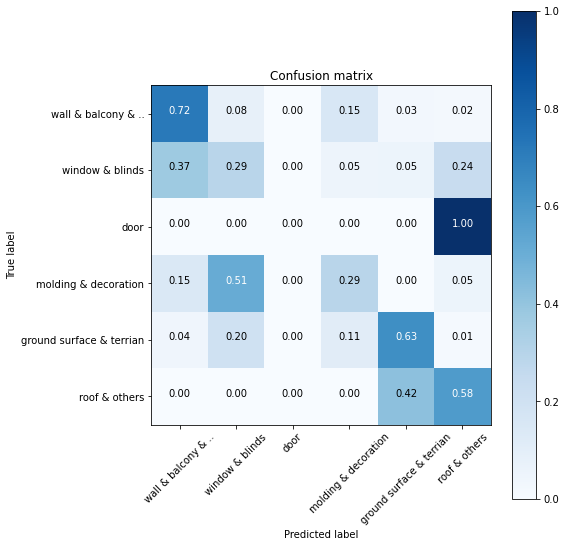

In [98]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(cla_test.keys()), normalize=True)

Confusion matrix, without normalization


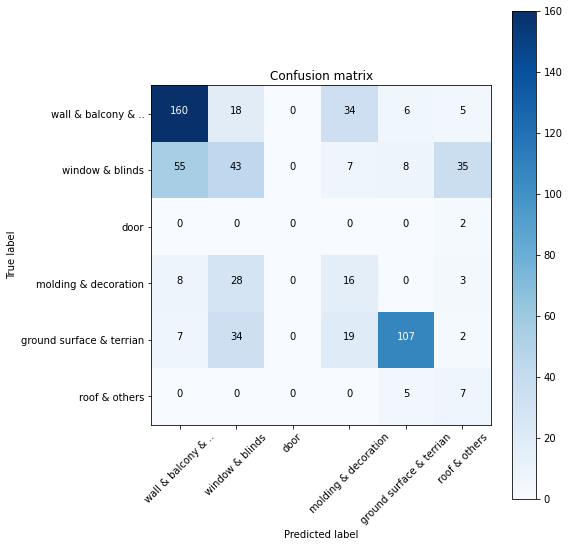

In [99]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(cla_test.keys()), normalize=False)